# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

## Load Data

In [2]:
# Load Good Data
df_good = pd.read_csv('../../02_analysis/df_good.csv')

# Load Target Data
df_target = pd.read_csv('../../02_analysis/df_target.csv')
df_target.drop(columns=['sr_gap_heuristic'], inplace=True)

# Load Predictors Data
df_predictors = pd.read_csv('../../02_analysis/mlm_results.csv')

/var/folders/lw/ys_1b9sj08s904m4402qr0bm0000gn/T/ipykernel_41564/1402741724.py:2: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_good = pd.read_csv('../../02_analysis/df_good.csv')


### Create Feat. Eng. DF

In [3]:
from helper_functions import subject_df

# create df with all subjects and with engineered features
for i in range(len(np.unique(df_good.PID))):
    if i ==0:
        df_featEng = subject_df(df=df_good, sub_num=i)
        
    else:
        new_sub = subject_df(df=df_good, sub_num=i)
        df_featEng = pd.concat([df_featEng, new_sub], ignore_index=True)

/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_3_data_analysis/02_analysis/Models/helper_functions.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['day_of_week'] = cat_df['day_of_week'].map(weekdays)
/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_3_data_analysis/02_analysis/Models/helper_functions.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [8]:
df_featEng['PID'] = df_good['PID']
df_featEng['trial_date'] = df_good['trial_date']

/var/folders/lw/ys_1b9sj08s904m4402qr0bm0000gn/T/ipykernel_41564/3168445969.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_featEng['PID'] = df_good['PID']
/var/folders/lw/ys_1b9sj08s904m4402qr0bm0000gn/T/ipykernel_41564/3168445969.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_featEng['trial_date'] = df_good['trial_date']


### Add Targets

In [9]:
# Convert 'trial_date' to datetime
df_featEng['trial_date'] = pd.to_datetime(df_featEng['trial_date'])
df_target['trial_date'] = pd.to_datetime(df_target['trial_date'])

df = pd.merge(df_featEng, df_target, on=['PID', 'trial_date'])

### Look at Predictors

In [10]:
df_predictors.loc[df_predictors['feature'].str.contains('css')]

,feature,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],Converged,z_abs
206,css,-2.545449,0.736890,-3.454316,0.000552,-3.989726,-1.101172,True,3.454316
984,css_rolling_mean_3,-3.367694,1.119037,-3.009458,0.002617,-5.560967,-1.174422,True,3.009458
985,css_exponential_rolling_mean_3,-2.845481,1.122613,-2.534695,0.011255,-5.045761,-0.645200,True,2.534695
986,css_rolling_mean_7,-3.562445,1.319829,-2.699172,0.006951,-6.149261,-0.975628,True,2.699172
987,css_exponential_rolling_mean_7,-3.148316,1.481568,-2.124989,0.033588,-6.052136,-0.244496,True,2.124989
1323,css_exponential_rolling_mean_expanding,-2.716304,3.353372,-0.810022,0.417928,-9.288792,3.856184,True,0.810022
1515,css_rolling_var_7,2.083869,1.055958,1.973439,0.048446,0.014229,4.153509,True,1.973439
2151,css_lag_1,-1.855136,0.799501,-2.320368,0.020321,-3.422129,-0.288143,True,2.320368
2152,css_lag_2,-1.355116,0.829507,-1.633640,0.102334,-2.980920,0.270688,True,1.633640
2153,css_lag_3,-1.310618,0.823431,-1.591654,0.111462,-2.924513,0.303278,True,1.591654


In [11]:
# Find the 10 largest z values
largest_z = df_predictors.nlargest(10, 'z')[['feature', 'z']]

# Find the 10 smallest z values
smallest_z = df_predictors.nsmallest(10, 'z')[['feature', 'z']]

# Find the 20 largest absolute z values
df_predictors['z_abs'] = df_predictors['z'].abs()
df_predictors_sorted = df_predictors.sort_values(by='z_abs', ascending=False)
top_20_features_all = df_predictors_sorted.head(20).drop(columns='z_abs')[['feature', 'z']].reset_index(drop=True)
# print("10 largest z values:")
# print(largest_z)
# print("\n10 smallest z values:")
# print(smallest_z)
print("\n20 largest absolute z values:")
print(top_20_features_all)


20 largest absolute z values:
                                              feature         z
0                                    sr_gap_heuristic  8.663298
1                           sr_DAILY_goal1_confidence -7.477477
2   sr_DAILY_goal1_confidence_diff_rolling_mean_7_day -7.250637
3                                 sr_DAILY_past24_gap  6.958771
4                     sr_gap_heuristic_rolling_mean_3  6.150563
5                               sr_DAILY_goal1_report -5.988481
6   sr_DAILY_goal1_confidence_diff_rolling_mean_3_day -5.975138
7             sr_gap_heuristic_diff_to_expanding_mean  5.959420
8                           sr_DAILY_goal2_confidence -5.877121
9            sr_gap_heuristic_diff_rolling_mean_7_day  5.718491
10                 sr_DAILY_past24_gap_rolling_mean_3  5.677712
11                       sr_DAILY_past24_productivity -5.604551
12                             sr_gap_heuristic_lag_1  5.331343
13                          sr_DAILY_goal1_importance -5.194307
14       

# Models

## Target: Next Day

### Current Day for Next Day

Today for Tomorrow Model
---
 MAE: 15.8066
 R²: 0.2117


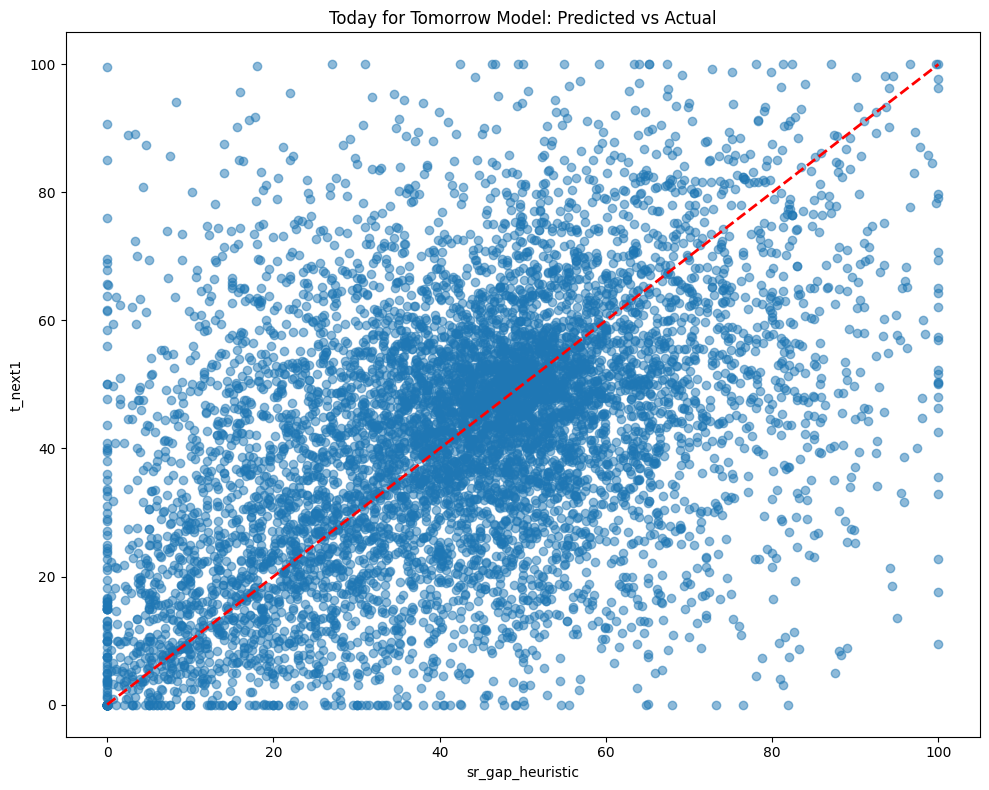

In [ ]:
cor_df = df.loc[:, ['t_next1', 'sr_gap_heuristic']]
cor_df.dropna(inplace=True)

mae = mean_absolute_error(cor_df['t_next1'], cor_df['sr_gap_heuristic'])

# Reshape the data for sklearn
X = cor_df['sr_gap_heuristic'].values.reshape(-1, 1)
y = cor_df['t_next1'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

if mae is not None and r2 is not None:
    print(f'Today for Tomorrow Model\n---\n MAE: {mae:.4f}\n R²: {r2:.4f}')

    # Visualize predictions
    plt.figure(figsize=(10, 8))
    plt.scatter(df['sr_gap_heuristic'], df['t_next1'], alpha=0.5)
    plt.plot([df['sr_gap_heuristic'].min(), df['sr_gap_heuristic'].max()], 
             [df['sr_gap_heuristic'].min(), df['sr_gap_heuristic'].max()], 'r--', lw=2)
    plt.xlabel('sr_gap_heuristic')
    plt.ylabel('t_next1')
    plt.title('Today for Tomorrow Model: Predicted vs Actual')
    plt.tight_layout()
    plt.show()
else:
    print("Unable to calculate metrics due to insufficient valid data.")

### Expanding Mean for Next Day

What if we just predict the next day's value based on the average value of all days up until and including the current day?

**NOTE** NEED TO FIX CUMULATIVE MEAN...not working correctly

I think it may be a matter of going column by column and grouping by PID rather than subject by subject...probably also faster.

In [18]:
# Calculate the cumulative mean of sr_gap_heuristic for each PID
df['sr_gap_heuristic_cumulative_mean'] = df.groupby('PID')['sr_gap_heuristic'].transform(
    lambda x: x.expanding().mean()
)
df['sr_gap_heuristic_cumulative_mean'] = df.groupby('PID')['sr_gap_heuristic'].transform(
    lambda x: x.expanding().mean()
)

In [22]:
df[['PID', 'trial_date', 'sr_gap_heuristic', 'sr_gap_heuristic_cumulative_mean', 't_next1']]

,PID,trial_date,sr_gap_heuristic,sr_gap_heuristic_cumulative_mean,t_next1
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-30,5.00,5.000000,15.25
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-31,15.25,10.125000,46.35
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,46.35,22.200000,43.70
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,43.70,27.575000,45.60
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,45.60,31.180000,11.55
...,...,...,...,...,...
8920,ffe41956-4096-4732-8cfb-8192829bd482,2023-04-20,58.05,44.335185,26.25
8921,ffe41956-4096-4732-8cfb-8192829bd482,2023-04-21,26.25,44.114634,67.35
8922,ffe41956-4096-4732-8cfb-8192829bd482,2023-04-22,67.35,44.394578,52.15
8923,ffe41956-4096-4732-8cfb-8192829bd482,2023-04-23,52.15,44.486905,NaN


Cumulative Mean Model
---
 MAE: 13.5685
 R²: 0.2699


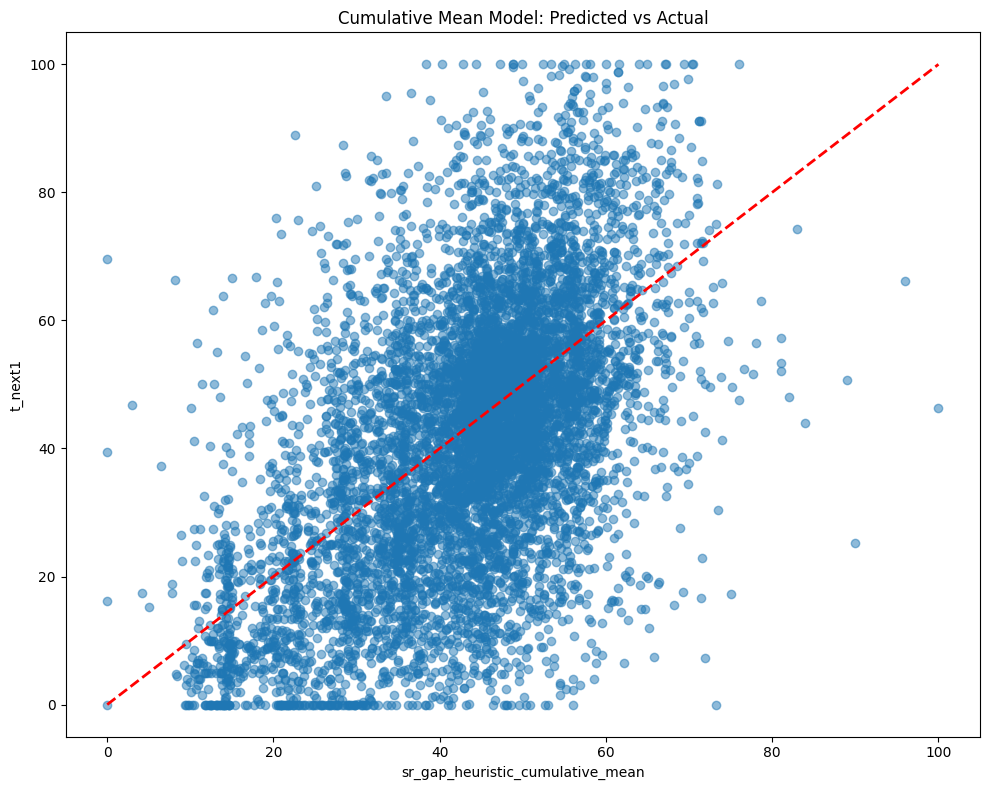

In [43]:
cor_df = df.loc[:, ['t_next1', 'sr_gap_heuristic_cumulative_mean']]
cor_df.dropna(inplace=True)

mae = mean_absolute_error(cor_df['t_next1'], cor_df['sr_gap_heuristic_cumulative_mean'])
r2 = r2_score(cor_df['t_next1'], cor_df['sr_gap_heuristic_cumulative_mean'])

if mae is not None and r2 is not None:
    print(f'Cumulative Mean Model\n---\n MAE: {mae:.4f}\n R²: {r2:.4f}')

    # Visualize predictions
    plt.figure(figsize=(10, 8))
    plt.scatter(df['sr_gap_heuristic_cumulative_mean'], df['t_next1'], alpha=0.5)
    plt.plot([df['sr_gap_heuristic_cumulative_mean'].min(), df['sr_gap_heuristic_cumulative_mean'].max()], 
             [df['sr_gap_heuristic_cumulative_mean'].min(), df['sr_gap_heuristic_cumulative_mean'].max()], 'r--', lw=2)
    plt.xlabel('sr_gap_heuristic_cumulative_mean')
    plt.ylabel('t_next1')
    plt.title('Cumulative Mean Model: Predicted vs Actual')
    plt.tight_layout()
    plt.show()
else:
    print("Unable to calculate metrics due to insufficient valid data.")

## Target: Next 3 Days Exponential Moving Average

### Current Day for Next Day

Today for Tomorrow (3E) Model
---
 MAE: 13.9647
 R²: 0.2710


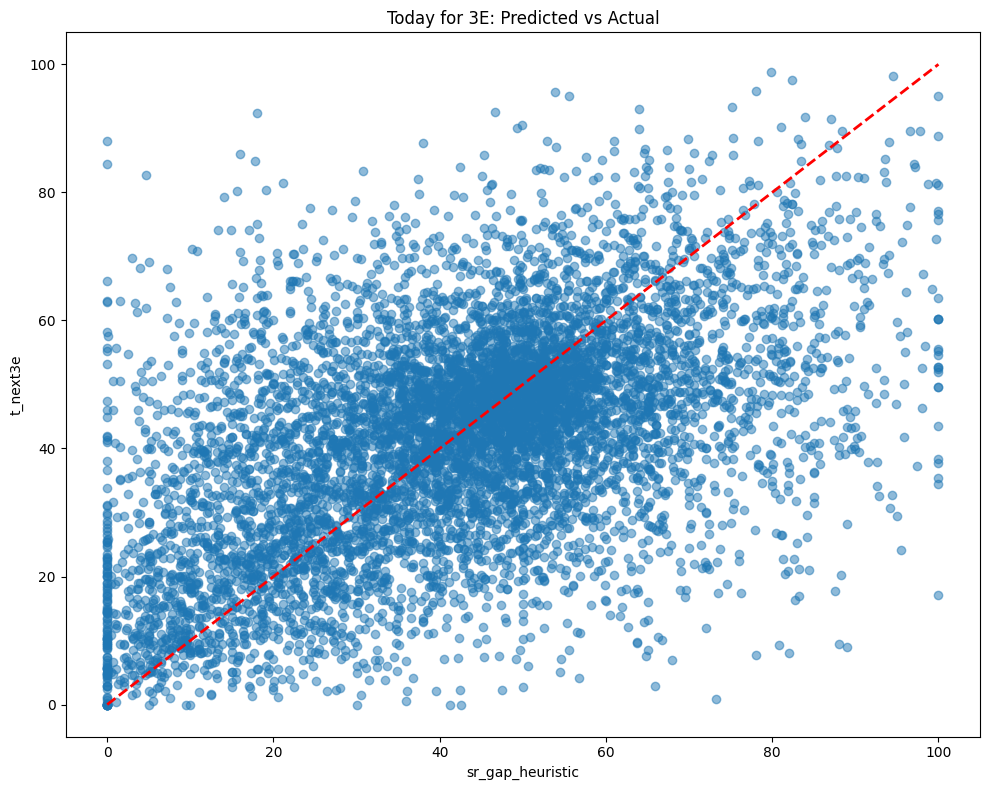

In [68]:
cor_df = df.loc[:, ['t_next3e', 'sr_gap_heuristic']]
cor_df.dropna(inplace=True)

mae = mean_absolute_error(cor_df['t_next3e'], cor_df['sr_gap_heuristic'])

# Reshape the data for sklearn
X = cor_df['sr_gap_heuristic'].values.reshape(-1, 1)
y = cor_df['t_next3e'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

if mae is not None and r2 is not None:
    print(f'Today for Tomorrow (3E) Model\n---\n MAE: {mae:.4f}\n R²: {r2:.4f}')

    # Visualize predictions
    plt.figure(figsize=(10, 8))
    plt.scatter(df['sr_gap_heuristic'], df['t_next3e'], alpha=0.5)
    plt.plot([df['sr_gap_heuristic'].min(), df['sr_gap_heuristic'].max()], 
             [df['sr_gap_heuristic'].min(), df['sr_gap_heuristic'].max()], 'r--', lw=2)
    plt.xlabel('sr_gap_heuristic')
    plt.ylabel('t_next3e')
    plt.title('Today for 3E: Predicted vs Actual')
    plt.tight_layout()
    plt.show()
else:
    print("Unable to calculate metrics due to insufficient valid data.")

### Expanding Mean for Next Day

What if we just predict the next day's value based on the average value of all days up until and including the current day?

**NOTE** NEED TO FIX CUMULATIVE MEAN...not working correctly

I think it may be a matter of going column by column and grouping by PID rather than subject by subject...probably also faster.

Cumulative Mean Model
---
 MAE: 10.3773
 R²: 0.3788


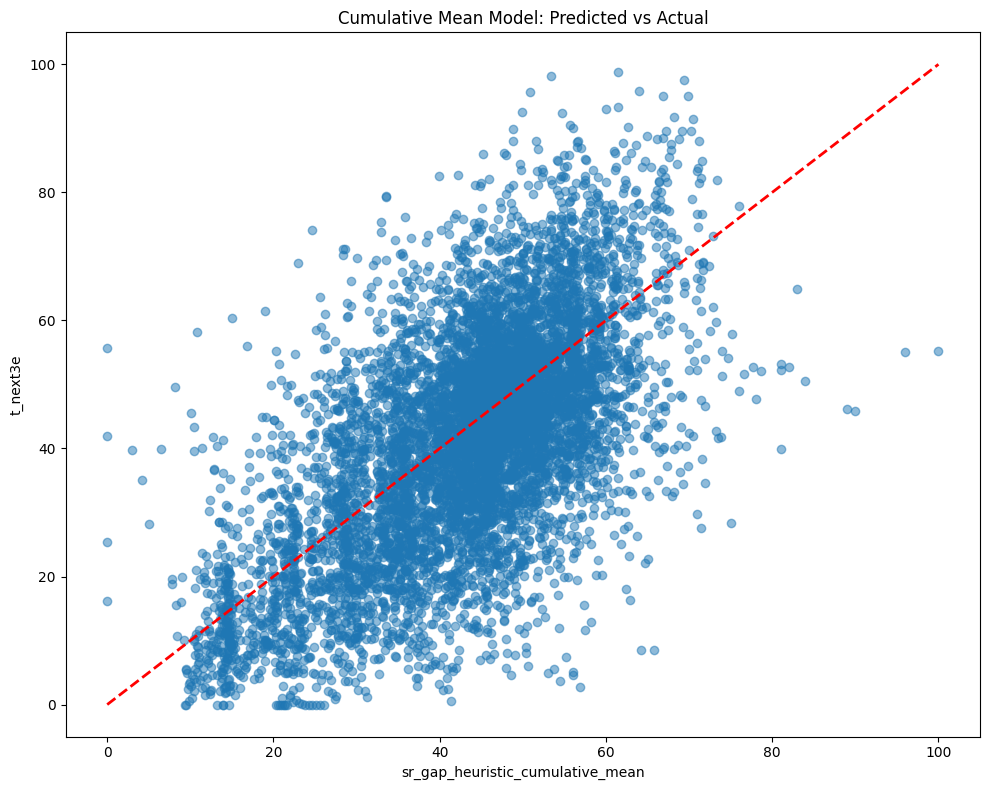

In [71]:
cor_df = df.loc[:, ['t_next3e', 'sr_gap_heuristic_cumulative_mean']]
cor_df.dropna(inplace=True)

mae = mean_absolute_error(cor_df['t_next3e'], cor_df['sr_gap_heuristic_cumulative_mean'])
r2 = r2_score(cor_df['t_next3e'], cor_df['sr_gap_heuristic_cumulative_mean'])

if mae is not None and r2 is not None:
    print(f'Cumulative Mean Model\n---\n MAE: {mae:.4f}\n R²: {r2:.4f}')

    # Visualize predictions
    plt.figure(figsize=(10, 8))
    plt.scatter(df['sr_gap_heuristic_cumulative_mean'], df['t_next3e'], alpha=0.5)
    plt.plot([df['sr_gap_heuristic_cumulative_mean'].min(), df['sr_gap_heuristic_cumulative_mean'].max()], 
             [df['sr_gap_heuristic_cumulative_mean'].min(), df['sr_gap_heuristic_cumulative_mean'].max()], 'r--', lw=2)
    plt.xlabel('sr_gap_heuristic_cumulative_mean')
    plt.ylabel('t_next3e')
    plt.title('Cumulative Mean Model: Predicted vs Actual')
    plt.tight_layout()
    plt.show()
else:
    print("Unable to calculate metrics due to insufficient valid data.")

## Target: Next 3 Days Simple Moving Average

### Current Day for Next Day

Today for Tomorrow (3E) Model
---
 MAE: 13.9179
 R²: 0.2672


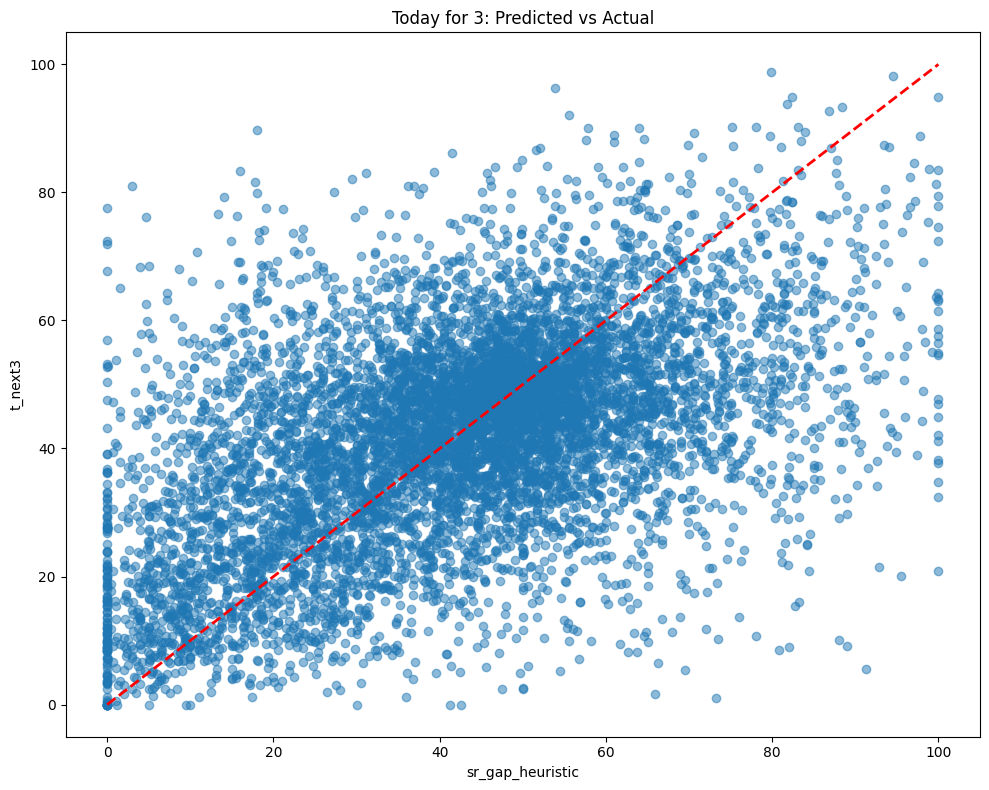

In [73]:
cor_df = df.loc[:, ['t_next3', 'sr_gap_heuristic']]
cor_df.dropna(inplace=True)

mae = mean_absolute_error(cor_df['t_next3'], cor_df['sr_gap_heuristic'])

# Reshape the data for sklearn
X = cor_df['sr_gap_heuristic'].values.reshape(-1, 1)
y = cor_df['t_next3'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

if mae is not None and r2 is not None:
    print(f'Today for Tomorrow (3E) Model\n---\n MAE: {mae:.4f}\n R²: {r2:.4f}')

    # Visualize predictions
    plt.figure(figsize=(10, 8))
    plt.scatter(df['sr_gap_heuristic'], df['t_next3'], alpha=0.5)
    plt.plot([df['sr_gap_heuristic'].min(), df['sr_gap_heuristic'].max()], 
             [df['sr_gap_heuristic'].min(), df['sr_gap_heuristic'].max()], 'r--', lw=2)
    plt.xlabel('sr_gap_heuristic')
    plt.ylabel('t_next3')
    plt.title('Today for 3: Predicted vs Actual')
    plt.tight_layout()
    plt.show()
else:
    print("Unable to calculate metrics due to insufficient valid data.")

### Expanding Mean for Next Day

What if we just predict the next day's value based on the average value of all days up until and including the current day?

**NOTE** NEED TO FIX CUMULATIVE MEAN...not working correctly

I think it may be a matter of going column by column and grouping by PID rather than subject by subject...probably also faster.

Cumulative Mean Model
---
 MAE: 9.8199
 R²: 0.3929


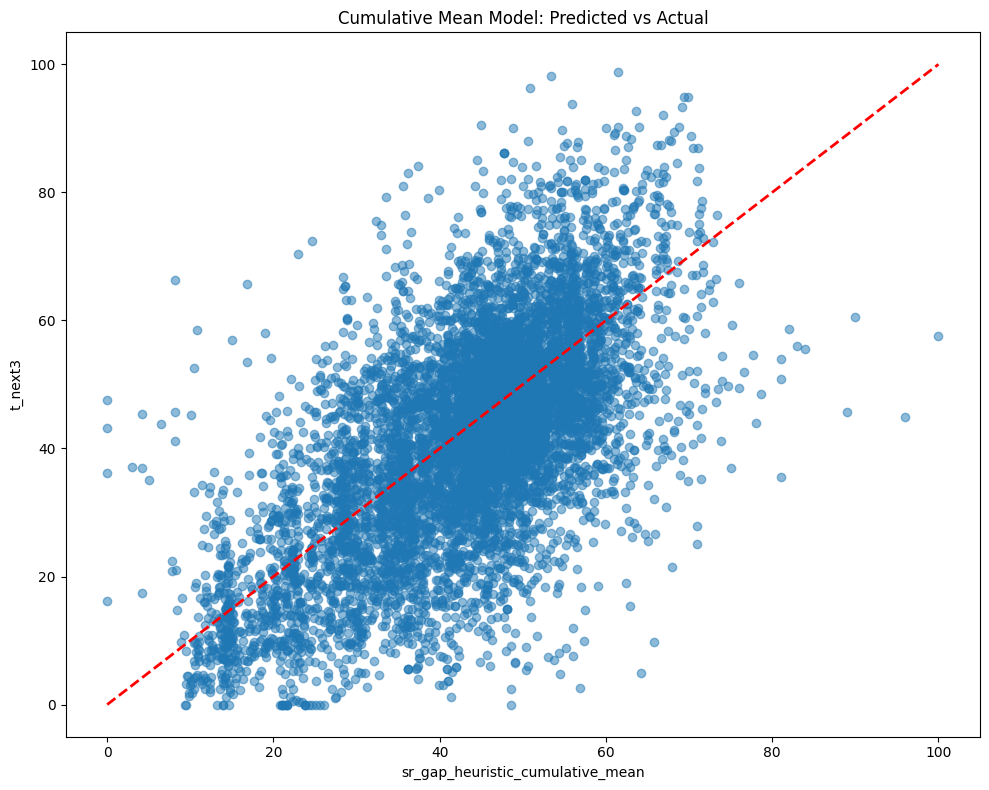

In [74]:
cor_df = df.loc[:, ['t_next3', 'sr_gap_heuristic_cumulative_mean']]
cor_df.dropna(inplace=True)

mae = mean_absolute_error(cor_df['t_next3'], cor_df['sr_gap_heuristic_cumulative_mean'])
r2 = r2_score(cor_df['t_next3'], cor_df['sr_gap_heuristic_cumulative_mean'])

if mae is not None and r2 is not None:
    print(f'Cumulative Mean Model\n---\n MAE: {mae:.4f}\n R²: {r2:.4f}')

    # Visualize predictions
    plt.figure(figsize=(10, 8))
    plt.scatter(df['sr_gap_heuristic_cumulative_mean'], df['t_next3'], alpha=0.5)
    plt.plot([df['sr_gap_heuristic_cumulative_mean'].min(), df['sr_gap_heuristic_cumulative_mean'].max()], 
             [df['sr_gap_heuristic_cumulative_mean'].min(), df['sr_gap_heuristic_cumulative_mean'].max()], 'r--', lw=2)
    plt.xlabel('sr_gap_heuristic_cumulative_mean')
    plt.ylabel('t_next3')
    plt.title('Cumulative Mean Model: Predicted vs Actual')
    plt.tight_layout()
    plt.show()
else:
    print("Unable to calculate metrics due to insufficient valid data.")

# Linear Models

In [76]:
# Remove rows with missing values target values or missing sr_gap_heuristic
df = df.dropna(subset=['t_next1', 't_next3', 't_next3e', 'sr_gap_heuristic'])

# Sort data by PID and trial_date
df = df.sort_values(by=['PID', 'trial_date'])

# Select feature columns
def get_top_features(df_predictors, n=20):
    """
    Get the top n features from a DataFrame based on absolute z-values.
    
    Args:
    df_predictors (pd.DataFrame): DataFrame containing feature information
    n (int): Number of top features to return (default: 20)
    
    Returns:
    list: List of top n feature names
    """
    # Calculate absolute z-values
    df_predictors['z_abs'] = df_predictors['z'].abs()
    
    # Sort by absolute z-values and select top n
    df_predictors_sorted = df_predictors.sort_values(by='z_abs', ascending=False)
    top_features = df_predictors_sorted.head(n).drop(columns='z_abs')[['feature', 'z']].reset_index(drop=True)
    
    # Return list of feature names
    return list(top_features['feature'])

In [81]:
# due to changing helper_function names I need to update names in the df_predictors
df_predictors['feature'] = df_predictors['feature'].str.replace('expanding_mean', 'cumulative_mean', regex=False)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Prepare the data
feature_cols = get_top_features(df_predictors, n=20)
X = df[feature_cols]
y = df['t_next1']  # target variable

# Function to count non-NaN values
def count_non_nan(series):
    return series.notna().sum()

# Initial data counts
initial_counts = X.apply(count_non_nan)
total_initial = len(X)

print(f"Initial data points: {total_initial}")
print("Initial non-NaN counts per feature:")
print(initial_counts)

# Remove features with too many NaN values (e.g., more than 50%)
nan_threshold = 0.5
valid_features = X.columns[X.isnull().mean() < nan_threshold].tolist()
X = X[valid_features]

# Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
cv_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Remove rows with any NaN values
    train_mask = X_train.notna().all(axis=1)
    test_mask = X_test.notna().all(axis=1)
    
    X_train_clean = X_train[train_mask]
    y_train_clean = y_train[train_mask]
    X_test_clean = X_test[test_mask]
    y_test_clean = y_test[test_mask]
    
    # Fit model
    model = Lasso(alpha=0.1)  # alpha is the regularization strength
    model.fit(X_train_clean, y_train_clean)
    
    # Predict and calculate scores
    y_pred = model.predict(X_test_clean)
    mse = mean_squared_error(y_test_clean, y_pred)
    r2 = r2_score(y_test_clean, y_pred)
    
    cv_scores.append({
        'MSE': mse, 
        'R2': r2, 
        'Train data used': len(X_train_clean) / len(X_train),
        'Test data used': len(X_test_clean) / len(X_test)
    })

# Print cross-validation results
cv_df = pd.DataFrame(cv_scores)
print("\nCross-validation results:")
print(cv_df.mean())

# Fit final model on all data
final_X = X.dropna()
final_y = y[final_X.index]
final_model = Lasso(alpha=0.05)
final_model.fit(final_X, final_y)

# Get feature coefficients
feature_importance = pd.DataFrame({
    'feature': final_X.columns,
    'coefficient': final_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 features by absolute coefficient value:")
print(feature_importance.head(10))

# Final predictions and scores
y_pred = final_model.predict(final_X)
mse = mean_squared_error(final_y, y_pred)
r2 = r2_score(final_y, y_pred)
print("\nFinal model performance:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Data loss information
final_counts = final_X.apply(count_non_nan)
total_final = len(final_X)

print(f"\nFinal data points: {total_final}")
print(f"Data points lost: {total_initial - total_final} ({(1 - total_final/total_initial)*100:.2f}%)")
print("\nFinal non-NaN counts per feature:")
print(final_counts)

Initial data points: 7559
Initial non-NaN counts per feature:
sr_gap_heuristic                                        7559
sr_DAILY_goal1_confidence                               7289
sr_DAILY_goal1_confidence_diff_rolling_mean_7_day       6939
sr_DAILY_past24_gap                                     7549
sr_gap_heuristic_rolling_mean_3                         7190
sr_DAILY_goal1_report                                   7240
sr_DAILY_goal1_confidence_diff_rolling_mean_3_day       7212
sr_gap_heuristic_diff_to_cumulative_mean                2015
sr_DAILY_goal2_confidence                               7285
sr_gap_heuristic_diff_rolling_mean_7_day                7207
sr_DAILY_past24_gap_rolling_mean_3                      7485
sr_DAILY_past24_productivity                            7372
sr_gap_heuristic_lag_1                                  6916
sr_DAILY_goal1_importance                               7293
sr_DAILY_goal2_report                                   7240
sr_gap_heuristic_expone

In [86]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Prepare the data
feature_cols = get_top_features(df_predictors, n=20)
X = df[feature_cols]
y = df['t_next1']  # target variable

# Remove features with too many NaN values (e.g., more than 50%)
nan_threshold = 0.5
valid_features = X.columns[X.isnull().mean() < nan_threshold].tolist()
X = X[valid_features]

# Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up and fit HistGradientBoostingRegressor (handles NaN values natively)
model = HistGradientBoostingRegressor(random_state=42, max_iter=1000)

# Perform cross-validation
cv_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores.append({'MSE': mse, 'R2': r2})

# Print cross-validation results
cv_df = pd.DataFrame(cv_scores)
print("Cross-validation results:")
print(cv_df.mean())

# Fit final model on all data
final_model = HistGradientBoostingRegressor(random_state=42, max_iter=1000)
final_model.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance.head(10))

# Final predictions and scores
y_pred = final_model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("\nFinal model performance:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Cross-validation results:
MSE    344.605018
R2       0.124744
dtype: float64


AttributeError: 'HistGradientBoostingRegressor' object has no attribute 'feature_importances_'

# Claude

In [68]:
# Remove rows with missing values target values or missing sr_gap_heuristic
df = df.dropna(subset=['t_next1', 't_next3', 't_next3e', 'sr_gap_heuristic'])

# Sort data by PID and trial_date
df = df.sort_values(by=['PID', 'trial_date'])

# Select feature columns
def get_top_features(df_predictors, n=20):
    """
    Get the top n features from a DataFrame based on absolute z-values.
    
    Args:
    df_predictors (pd.DataFrame): DataFrame containing feature information
    n (int): Number of top features to return (default: 20)
    
    Returns:
    list: List of top n feature names
    """
    # Calculate absolute z-values
    df_predictors['z_abs'] = df_predictors['z'].abs()
    
    # Sort by absolute z-values and select top n
    df_predictors_sorted = df_predictors.sort_values(by='z_abs', ascending=False)
    top_features = df_predictors_sorted.head(n).drop(columns='z_abs')[['feature', 'z']].reset_index(drop=True)
    
    # Return list of feature names
    return list(top_features['feature'])

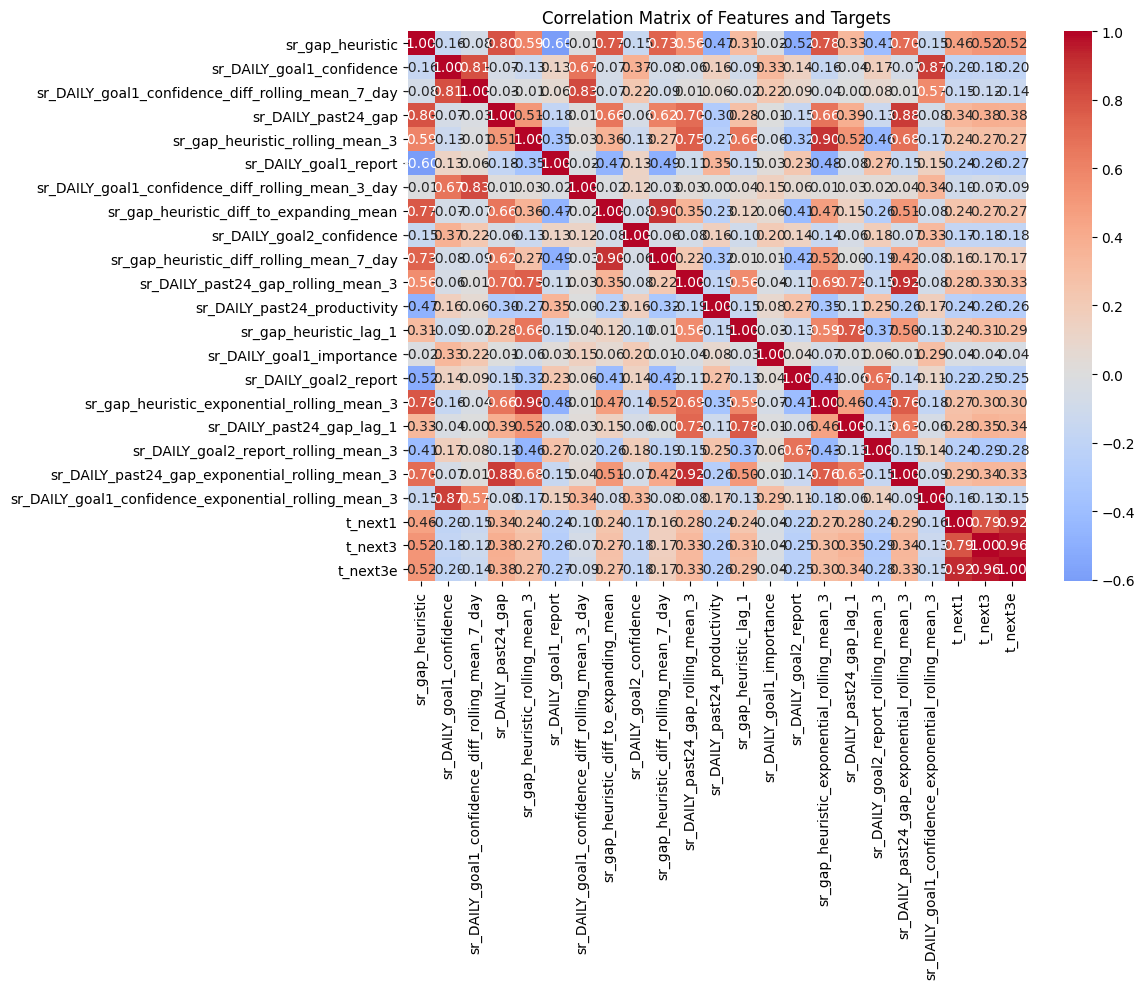

In [69]:
# Correlation matrix
feature_cols = get_top_features(df_predictors, n=20)

plt.figure(figsize=(12, 10))
sns.heatmap(df[feature_cols + ['t_next1', 't_next3', 't_next3e']].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Features and Targets")
plt.tight_layout()
plt.show()

In [73]:
# Mixed Effects Models

import statsmodels.api as sm
import statsmodels.formula.api as smf

def evaluate_mixed_model(subject_splits, formula):
    mse_list = []
    r2_list = []
    
    for pid, splits in subject_splits.items():
        for train, test in splits:
            model = smf.mixedlm(formula, train, groups=train['PID'])
            fitted_model = model.fit()
            
            y_pred = fitted_model.predict(test)
            y_true = test['t_next1']
            
            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            
            mse_list.append(mse)
            r2_list.append(r2)
    
    return np.mean(mse_list), np.mean(r2_list)

# Test models with varying numbers of predictors
selected_features = get_top_features(df_predictors, n=4)
results = []

for i in range(1, 5):
    formula = f't_next1 ~ {" + ".join(selected_features[:i])}'
    mse, r2 = evaluate_mixed_model(subject_splits, formula)
    results.append({
        'Model': f'Mixed Effects ({i} predictors)',
        'MSE': mse,
        'R2': r2
    })
    print(f'Mixed Effects Model ({i} predictors) - MSE: {mse}, R²: {r2}')

# Create a DataFrame with results
results_df = pd.DataFrame(results)
print(results_df)

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(results_df['Model'], results_df['R2'], marker='o')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Mixed Effects Models Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mixed Effects Model (1 predictors) - MSE: nan, R²: nan


IndexError: index 70 is out of bounds for axis 0 with size 70